In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import matplotlib.animation as animation
from IPython.display import HTML
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Prepare Results Data

In [ ]:

# Initialize empty lists to store the data frames
svm_MP_combined = []
svm_MV_combined = []
# Loop through the CSV files, read them into data frames, and append them to the lists
for i in range(1, 31):
    SVM_MP_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 2/MediaPipe_SVM_results_vid{i}.csv'
    SVM_MV_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 2/MoveNetLightning_SVM_results_vid{i}.csv'

    # Read the CSV files
    tempMP = pd.read_csv(SVM_MP_PATH)
    tempMV = pd.read_csv(SVM_MV_PATH)

    # Append the data frames to the lists
    svm_MP_combined.append(tempMP)
    svm_MV_combined.append(tempMV)

# Concatenate the data frames in each list along the y-axis
svm_MP_combined_df1 = pd.concat(svm_MP_combined, axis=0)
svm_MV_combined_df1 = pd.concat(svm_MV_combined, axis=0)

# Print the shape of the combined data frames to verify the result
print(f"MediaPipe combined shape: {svm_MP_combined_df1.shape}")
print(f"MoveNet combined shape: {svm_MV_combined_df1.shape}")

svm_MP_combined_df = pd.DataFrame(svm_MP_combined_df1)
svm_MV_combined_df = pd.DataFrame(svm_MV_combined_df1)

# Optionally, save the combined data frames to new CSV files
svm_MP_combined_df.rename(columns={'frame_proccessing_duration': 'MediaPipe_SVM_execution_Time'}, inplace=True)
svm_MV_combined_df.rename(columns={'frame_proccessing_duration': 'MoveNet_SVM_execution_Time'}, inplace=True)

svm_MP_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MediaPipe_SVM_detection_Time'}, inplace=True)
svm_MV_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MoveNet_SVM_detection_Time'}, inplace=True)


svm_MP_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MediaPipe_SVM_results.csv', index=False)
svm_MV_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MoveNetLightning_SVM_results.csv', index=False)


MediaPipe combined shape: (2995, 7)
MoveNet combined shape: (2995, 7)


In [ ]:
svm_MP_combined_df.head()

,Video_num,frame_indx,predictions,MediaPipe_SVM_execution_Time,MediaPipe_SVM_detection_Time,frame_width,frame_height
0,1,0,0,272.600889,NaN,640,480
1,1,1,0,183.171034,NaN,640,480
2,1,2,0,170.205355,NaN,640,480
3,1,3,0,157.702684,NaN,640,480
4,1,4,0,170.720100,NaN,640,480


In [ ]:
svm_MV_combined_df.head()

,Video_num,frame_indx,predictions,MoveNet_SVM_execution_Time,MoveNet_SVM_detection_Time,frame_width,frame_height
0,1,0,0,946.947813,NaN,640,480
1,1,1,0,412.304878,NaN,640,480
2,1,2,0,407.713890,NaN,640,480
3,1,3,0,412.062645,NaN,640,480
4,1,4,0,407.396555,NaN,640,480


In [ ]:

# Initialize empty lists to store the data frames
dnn_MP_combined = []
dnn_MV_combined = []

# Loop through the CSV files, read them into data frames, and append them to the lists
for i in range(1, 31):
    dnn_MP_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 3/MediaPipe_SVM_results_vid{i}.csv'
    dnn_MV_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 3/MoveNetLightning_SVM_results_vid{i}.csv'

    # Read the CSV files
    tempMP = pd.read_csv(dnn_MP_PATH)
    tempMV = pd.read_csv(dnn_MV_PATH)

    # Append the data frames to the lists
    dnn_MP_combined.append(tempMP)
    dnn_MV_combined.append(tempMV)

# Concatenate the data frames in each list along the y-axis
dnn_MP_combined_df1 = pd.concat(dnn_MP_combined, axis=0)
dnn_MV_combined_df1 = pd.concat(dnn_MV_combined, axis=0)

# Print the shape of the combined data frames to verify the result
print(f"MediaPipe combined shape: {dnn_MP_combined_df1.shape}")
print(f"MoveNet combined shape: {dnn_MV_combined_df1.shape}")


dnn_MP_combined_df = pd.DataFrame(dnn_MP_combined_df1)
dnn_MV_combined_df = pd.DataFrame(dnn_MV_combined_df1)

# Optionally, save the combined data frames to new CSV files
dnn_MP_combined_df.rename(columns={'frame_proccessing_duration': 'MediaPipe_DNN_execution_Time'}, inplace=True)
dnn_MV_combined_df.rename(columns={'frame_proccessing_duration': 'MoveNet_DNN_execution_Time'}, inplace=True)

dnn_MP_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MediaPipe_DNN_detection_Time'}, inplace=True)
dnn_MV_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MoveNet_DNN_detection_Time'}, inplace=True)

dnn_MP_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MediaPipe_DNN_results.csv', index=False)
dnn_MV_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MoveNetLightning_DNN_results.csv', index=False)


MediaPipe combined shape: (2995, 7)
MoveNet combined shape: (2995, 7)


In [ ]:
dnn_MP_combined_df.head()

,Video_num,frame_indx,predictions,MediaPipe_DNN_execution_Time,MediaPipe_DNN_detection_Time,frame_width,frame_height
0,1,0,3.164852e-07,675.507069,NaN,640,480
1,1,1,6.740738e-07,344.503641,NaN,640,480
2,1,2,2.227580e-07,408.929110,NaN,640,480
3,1,3,2.209568e-07,265.543461,NaN,640,480
4,1,4,1.961043e-07,255.012512,NaN,640,480


In [ ]:
dnn_MV_combined_df.head()

,Video_num,frame_indx,predictions,MoveNet_DNN_execution_Time,MoveNet_DNN_detection_Time,frame_width,frame_height
0,1,0,0.001388,1920.799255,NaN,640,480
1,1,1,0.000986,845.273495,NaN,640,480
2,1,2,0.000968,729.043961,NaN,640,480
3,1,3,0.000897,626.148224,NaN,640,480
4,1,4,0.000889,655.993223,NaN,640,480


In [ ]:
combined_SVM_df = svm_MV_combined_df.copy()
combined_SVM_df['MediaPipe_SVM_execution_Time'] = svm_MP_combined_df['MediaPipe_SVM_execution_Time'].copy()
combined_SVM_df['MediaPipe_SVM_detection_Time'] = svm_MP_combined_df['MediaPipe_SVM_detection_Time'].copy()
combined_SVM_df['MP_predictions'] = svm_MP_combined_df['predictions'].copy()

combined_SVM_df.head()

,Video_num,frame_indx,predictions,MoveNet_SVM_execution_Time,MoveNet_SVM_detection_Time,frame_width,frame_height,MediaPipe_SVM_execution_Time,MediaPipe_SVM_detection_Time,MP_predictions
0,1,0,0,946.947813,NaN,640,480,272.600889,NaN,0
1,1,1,0,412.304878,NaN,640,480,183.171034,NaN,0
2,1,2,0,407.713890,NaN,640,480,170.205355,NaN,0
3,1,3,0,412.062645,NaN,640,480,157.702684,NaN,0
4,1,4,0,407.396555,NaN,640,480,170.720100,NaN,0


In [ ]:
combined_DNN_df = dnn_MV_combined_df.copy()
combined_DNN_df['MediaPipe_DNN_execution_Time'] = dnn_MP_combined_df['MediaPipe_DNN_execution_Time'].copy()
combined_DNN_df['MediaPipe_DNN_detection_Time'] = dnn_MP_combined_df['MediaPipe_DNN_detection_Time'].copy()
combined_DNN_df['MP_predictions'] = dnn_MP_combined_df['predictions'].copy()

combined_DNN_df.head()

,Video_num,frame_indx,predictions,MoveNet_DNN_execution_Time,MoveNet_DNN_detection_Time,frame_width,frame_height,MediaPipe_DNN_execution_Time,MediaPipe_DNN_detection_Time,MP_predictions
0,1,0,0.001388,1920.799255,NaN,640,480,675.507069,NaN,3.164852e-07
1,1,1,0.000986,845.273495,NaN,640,480,344.503641,NaN,6.740738e-07
2,1,2,0.000968,729.043961,NaN,640,480,408.929110,NaN,2.227580e-07
3,1,3,0.000897,626.148224,NaN,640,480,265.543461,NaN,2.209568e-07
4,1,4,0.000889,655.993223,NaN,640,480,255.012512,NaN,1.961043e-07


In [ ]:

# Initialize empty lists to store the data frames
lstm_MP_combined = []
lstm_MV_combined = []
# Loop through the CSV files, read them into data frames, and append them to the lists
for i in range(1, 31):
    LSTM_MP_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 4/MediaPipe_SVM_results_vid{i}.csv'
    LSTM_MV_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 4/MoveNetLightning_SVM_results_vid{i}.csv'
    # '/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 4'
    # Read the CSV files
    tempMP = pd.read_csv(LSTM_MP_PATH)
    tempMV = pd.read_csv(LSTM_MV_PATH)

    # Append the data frames to the lists
    lstm_MP_combined.append(tempMP)
    lstm_MV_combined.append(tempMV)

# Concatenate the data frames in each list along the y-axis
lstm_MP_combined_df1 = pd.concat(lstm_MP_combined, axis=0)
lstm_MV_combined_df1 = pd.concat(lstm_MV_combined, axis=0)

# Print the shape of the combined data frames to verify the result
print(f"MediaPipe combined shape: {lstm_MP_combined_df1.shape}")
print(f"MoveNet combined shape: {lstm_MV_combined_df1.shape}")

lstm_MP_combined_df = pd.DataFrame(lstm_MP_combined_df1)
lstm_MV_combined_df = pd.DataFrame(lstm_MV_combined_df1)

# Optionally, save the combined data frames to new CSV files
lstm_MP_combined_df.rename(columns={'frame_proccessing_duration': 'MediaPipe_LSTM_execution_Time'}, inplace=True)
lstm_MV_combined_df.rename(columns={'frame_proccessing_duration': 'MoveNet_LSTM_execution_Time'}, inplace=True)

lstm_MP_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MediaPipe_LSTM_detection_Time'}, inplace=True)
lstm_MV_combined_df.rename(columns={'fall_detection_duration_perVideo': 'MoveNet_LSTM_detection_Time'}, inplace=True)


lstm_MP_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MediaPipe_LSTM_results.csv', index=False)
lstm_MV_combined_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_MoveNetLightning_LSTM_results.csv', index=False)


MediaPipe combined shape: (2995, 7)
MoveNet combined shape: (2995, 7)


In [ ]:
combined_LSTM_df = lstm_MV_combined_df.copy()
combined_LSTM_df['MediaPipe_LSTM_execution_Time'] = lstm_MP_combined_df['MediaPipe_LSTM_execution_Time'].copy()
combined_LSTM_df['MediaPipe_LSTM_detection_Time'] = lstm_MP_combined_df['MediaPipe_LSTM_detection_Time'].copy()
combined_LSTM_df['MP_predictions'] = lstm_MP_combined_df['predictions'].copy()

combined_LSTM_df.head()

,Video_num,frame_indx,predictions,MoveNet_LSTM_execution_Time,MoveNet_LSTM_detection_Time,frame_width,frame_height,MediaPipe_LSTM_execution_Time,MediaPipe_LSTM_detection_Time,MP_predictions
0,1,0,0.001453,1978.107929,NaN,640,480,2213.347912,NaN,3.635999e-19
1,1,1,0.001285,837.085485,NaN,640,480,712.552071,NaN,3.919189e-19
2,1,2,0.001156,732.982874,NaN,640,480,1016.366720,NaN,5.465719e-19
3,1,3,0.001138,813.080072,NaN,640,480,732.110500,NaN,7.718492e-19
4,1,4,0.001083,502.245903,NaN,640,480,559.715509,NaN,1.052468e-18


In [ ]:
combined_DNN_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_DNN_results.csv', index=False)
combined_SVM_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_SVM_results.csv', index=False)
combined_LSTM_df.to_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_LSTM_results.csv', index=False)


In [ ]:
svm_df = pd.read_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_SVM_results.csv')
dnn_df = pd.read_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_DNN_results.csv')
lstm_df = pd.read_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/Combined_LSTM_results.csv')


new_df = svm_df.loc[:,['MoveNet_SVM_execution_Time', 'MediaPipe_SVM_execution_Time']]
new_dnn_df = dnn_df.loc[:,['MoveNet_DNN_execution_Time', 'MediaPipe_DNN_execution_Time']]
new_lstm_df = lstm_df.loc[:,['MoveNet_LSTM_execution_Time', 'MediaPipe_LSTM_execution_Time']]


#Charts

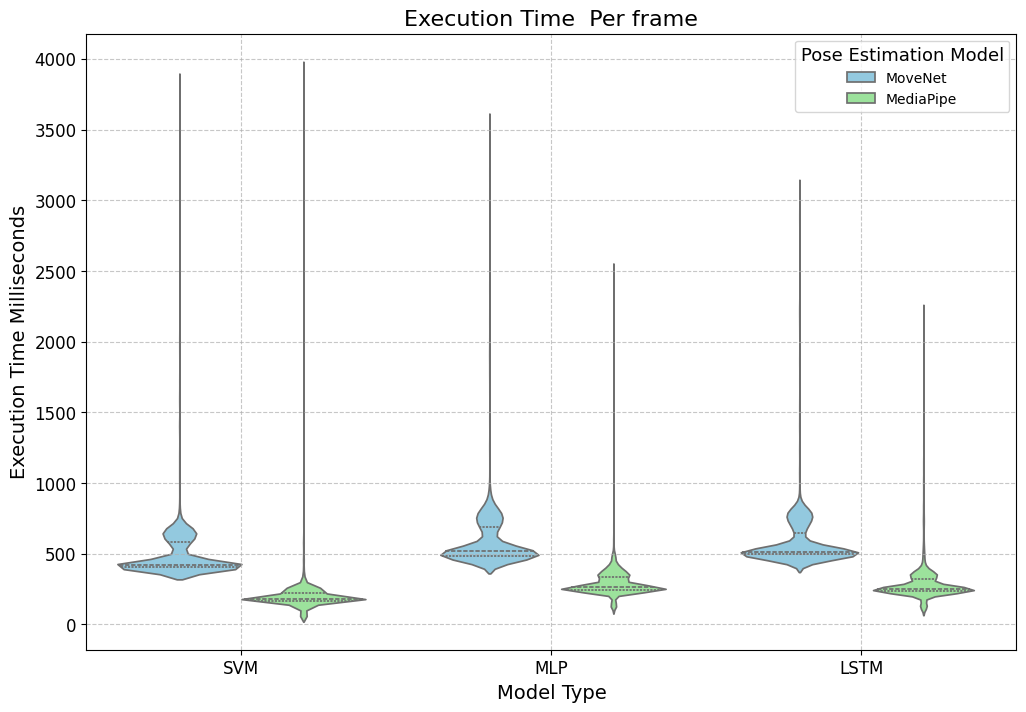

In [31]:
#@title Violin plot for frames Execution time
svm_df2 = svm_df.melt(value_vars=['MoveNet_SVM_execution_Time', 'MediaPipe_SVM_execution_Time'], var_name='Model', value_name='Execution_Time')
dnn_df2 = dnn_df.melt(value_vars=['MoveNet_DNN_execution_Time', 'MediaPipe_DNN_execution_Time'], var_name='Model', value_name='Execution_Time')
lstm_df2 = lstm_df.melt(value_vars=['MoveNet_LSTM_execution_Time', 'MediaPipe_LSTM_execution_Time'], var_name='Model', value_name='Execution_Time')

# Add a column to distinguish between SVM, DNN, and LSTM
svm_df2['Type'] = 'SVM'
dnn_df2['Type'] = 'MLP'
lstm_df2['Type'] = 'LSTM'

# Combine all dataframes
combined_df3 = pd.concat([svm_df2, dnn_df2, lstm_df2])

# Simplify the model names for better legend
combined_df3['Model'] = combined_df3['Model'].str.replace('_SVM_execution_Time', '').str.replace('_DNN_execution_Time', '').str.replace('_LSTM_execution_Time', '')

# Define a consistent color palette for the models
palette = {
    'MoveNet': 'skyblue',
    'MediaPipe': 'lightgreen'
}

# Customization for violin plot
plt.figure(figsize=(12, 8))

# Create violin plot with consistent colors
sns.violinplot(x='Type', y='Execution_Time', hue='Model', data=combined_df3, palette=palette, inner="quartile")

# Customizing plot
plt.title('Execution Time  Per frame', fontsize=16)
plt.xlabel('Model Type', fontsize=14)
plt.ylabel('Execution Time Milliseconds', fontsize=14)
plt.legend(title='Pose Estimation Model', title_fontsize='13', loc='upper right')

# Customize grid and ticks
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


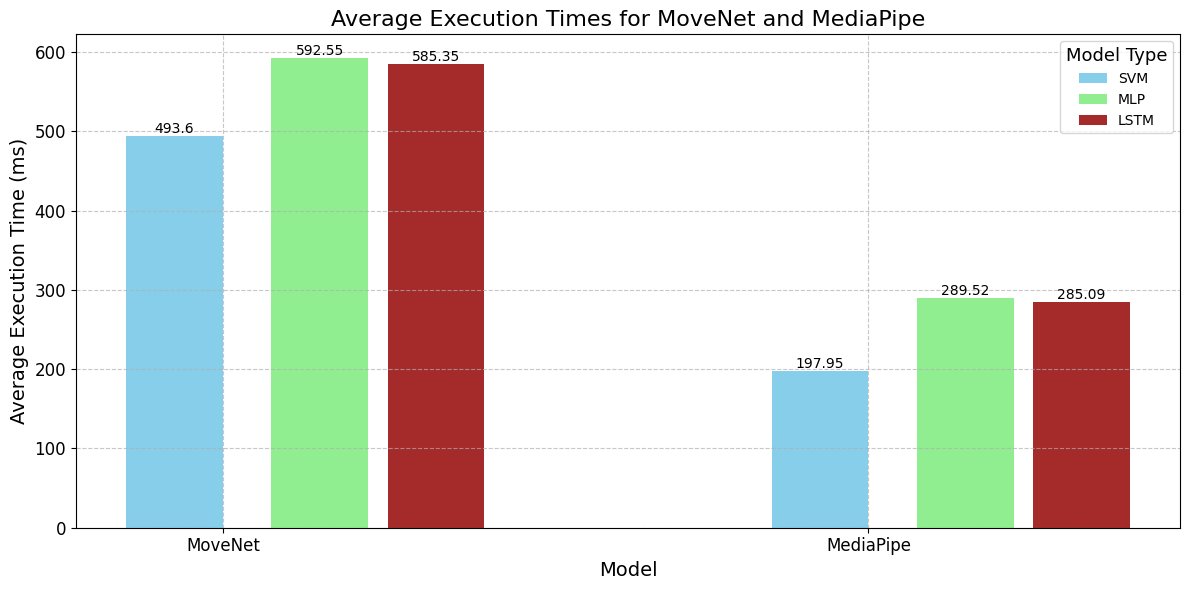

In [ ]:
#@title Calculate average execution times
avg_svm_times = svm_df.mean()
avg_dnn_times = dnn_df.mean()
avg_lstm_times = lstm_df.mean()

# Create a DataFrame for plotting
data = {
    'Model': ['MoveNet', 'MediaPipe'],
    'SVM': [avg_svm_times['MoveNet_SVM_execution_Time'], avg_svm_times['MediaPipe_SVM_execution_Time']],
    'MLP': [avg_dnn_times['MoveNet_DNN_execution_Time'], avg_dnn_times['MediaPipe_DNN_execution_Time']],
    'LSTM': [avg_lstm_times['MoveNet_LSTM_execution_Time'], avg_lstm_times['MediaPipe_LSTM_execution_Time']]

}
df4 = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.15
bar_positions = range(len(df4['Model']))

# Plot bars for SVM and DNN
bars1 = ax.bar([p - bar_width/2 for p in bar_positions], df4['SVM'], bar_width, color=['skyblue'], label='SVM')
bars2 = ax.bar([p + bar_width for p in bar_positions], df4['MLP'], bar_width, color=['lightgreen'], label='MLP')
bars3 = ax.bar([p + bar_width*2.2 for p in bar_positions], df4['LSTM'], bar_width, color=['brown'], label='LSTM')

# Add titles and labels
ax.set_title('Average Execution Times for MoveNet and MediaPipe', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Average Execution Time (ms)', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(df4['Model'])
ax.legend(title='Model Type', title_fontsize='13')

# Customize grid and ticks
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add value labels on bars
for bars in [bars1, bars2 , bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


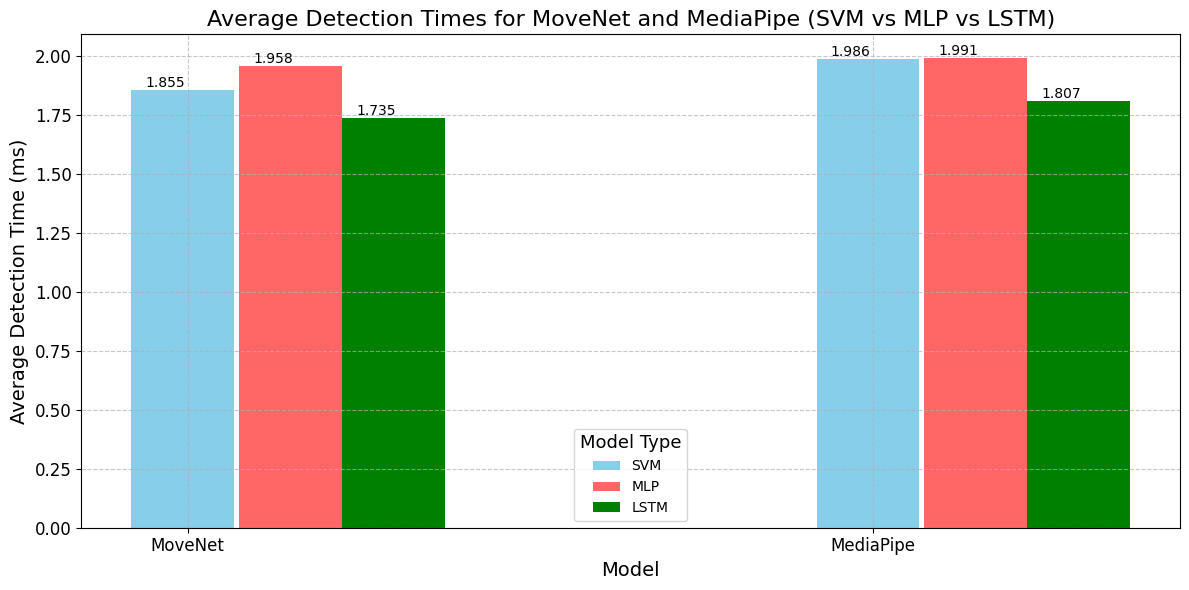

In [ ]:
#@title Calculate average detection times
avg_svm_times = svm_df.mean()
avg_dnn_times = dnn_df.mean()
avg_lstm_times = lstm_df.mean()

# Create a DataFrame for plotting MoveNet_SVM_detection_Time     'MoveNet_LSTM': avg_lstm_times['MoveNet_LSTM_detection_Time'],
    # 'MediaPipe_LSTM': avg_lstm_times['MediaPipe_LSTM_detection_Time']

data = {
    'Model': ['MoveNet', 'MediaPipe'],
    'SVM': [avg_svm_times['MoveNet_SVM_detection_Time'], avg_svm_times['MediaPipe_SVM_detection_Time']],
    'MLP': [avg_dnn_times['MoveNet_DNN_detection_Time'], avg_dnn_times['MediaPipe_DNN_detection_Time']],
    'LSTM': [avg_lstm_times['MoveNet_LSTM_detection_Time'], avg_lstm_times['MediaPipe_LSTM_detection_Time']]

}
df4 = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and positions
bar_width = 0.15
bar_positions = range(len(df4['Model']))

# Plot bars for SVM and DNN
bars1 = ax.bar([p - bar_width/20 for p in bar_positions], df4['SVM'], bar_width, color=['skyblue'], label='SVM')
bars2 = ax.bar([p + bar_width for p in bar_positions], df4['MLP'], bar_width, color=['#FF6666'], label='MLP')
bars3 = ax.bar([p + bar_width*2 for p in bar_positions], df4['LSTM'], bar_width, color=['green'], label='LSTM')


# Add titles and labels
ax.set_title('Average Detection Times for MoveNet and MediaPipe (SVM vs MLP vs LSTM)', fontsize=16)
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Average Detection Time (ms)', fontsize=14)
ax.set_xticks(bar_positions)
ax.set_xticklabels(df4['Model'])
ax.legend(title='Model Type', title_fontsize='13')

# Customize grid and ticks
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add value labels on bars
for bars in [bars1, bars2 , bars3]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/3, yval, round(yval, 3), va='bottom', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


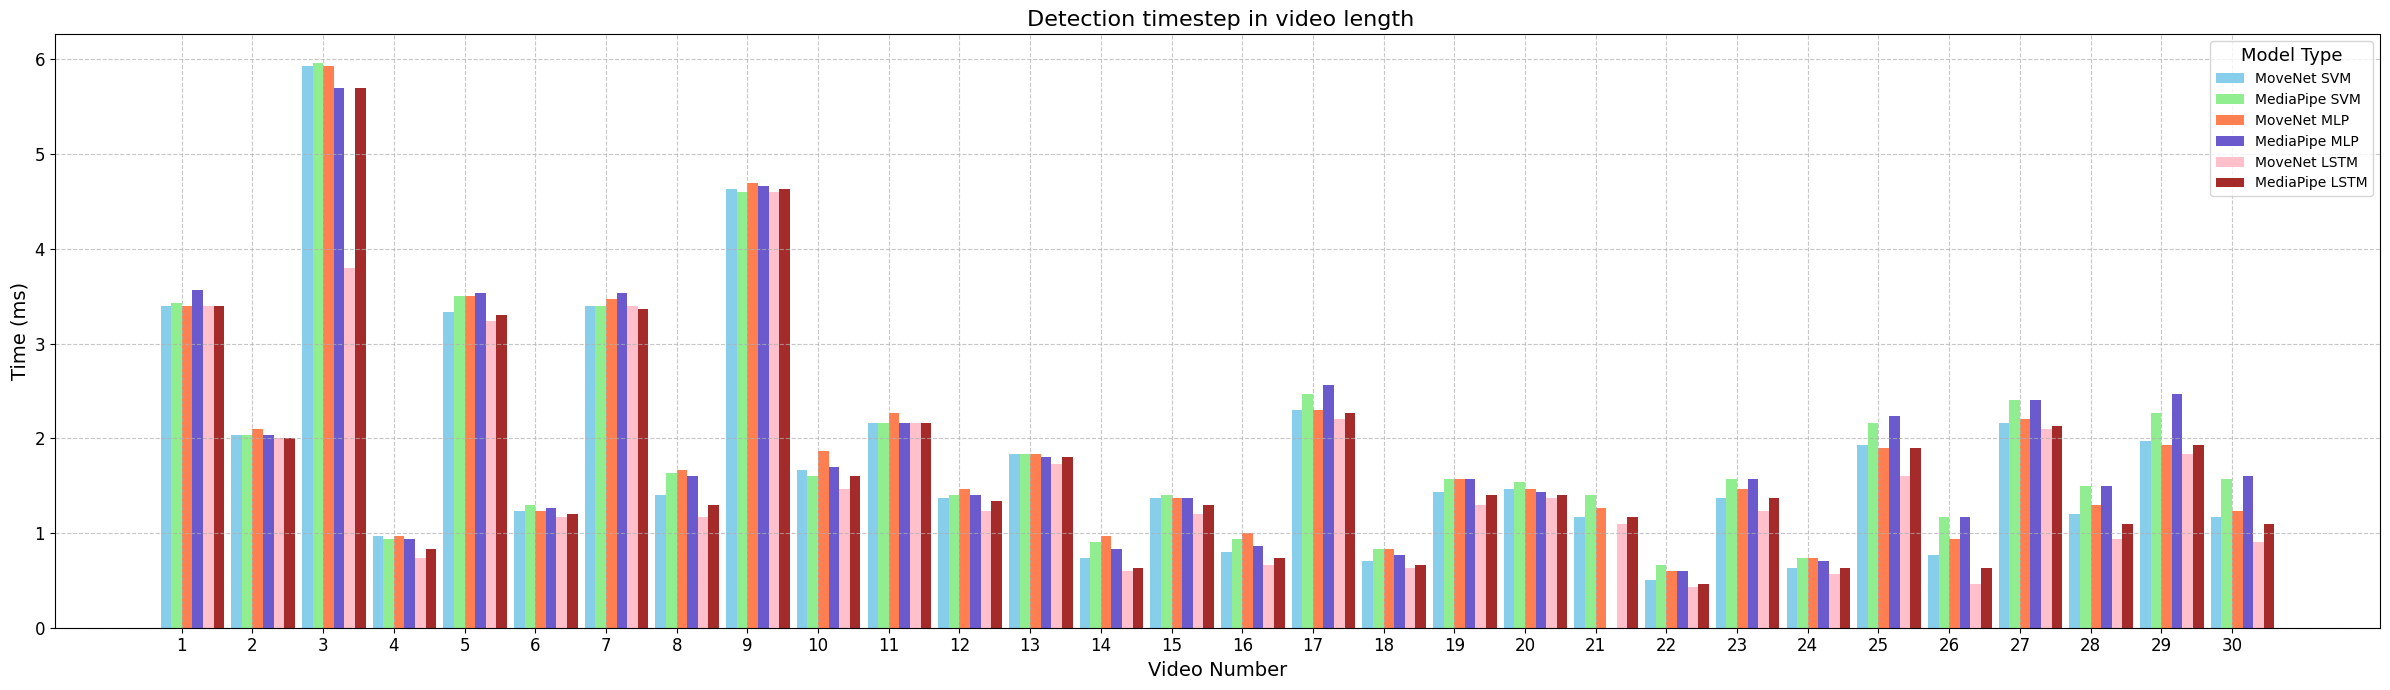

In [33]:
#@title Detection timestep by Video
avg_svm_times = svm_df.groupby('Video_num').mean()
avg_dnn_times = dnn_df.groupby('Video_num').mean()
avg_lstm_times = lstm_df.groupby('Video_num').mean()


# Create a DataFrame for plotting
data = {
    'Video_num': avg_svm_times.index,
    'MoveNet_SVM': avg_svm_times['MoveNet_SVM_detection_Time'],
    'MediaPipe_SVM': avg_svm_times['MediaPipe_SVM_detection_Time'],
    'MoveNet_MLP': avg_dnn_times['MoveNet_DNN_detection_Time'],
    'MediaPipe_MLP': avg_dnn_times['MediaPipe_DNN_detection_Time'],
    'MoveNet_LSTM': avg_lstm_times['MoveNet_LSTM_detection_Time'],
    'MediaPipe_LSTM': avg_lstm_times['MediaPipe_LSTM_detection_Time']

}

df4 = pd.DataFrame(data)

# Plotting
fig, ax = plt.subplots(figsize=(24, 7))

# Define bar width and positions
bar_width = 0.15

video_positions = range(len(df4['Video_num']))

# Plot bars for each combination
bars1 = ax.bar([p - 1.5*bar_width for p in video_positions], df4['MoveNet_SVM'], bar_width, color='skyblue', label='MoveNet SVM')
bars2 = ax.bar([p - 0.5*bar_width for p in video_positions], df4['MediaPipe_SVM'], bar_width, color='lightgreen', label='MediaPipe SVM')
bars3 = ax.bar([p + 0.5*bar_width for p in video_positions], df4['MoveNet_MLP'], bar_width, color='coral', label='MoveNet MLP')
bars4 = ax.bar([p + 1.5*bar_width for p in video_positions], df4['MediaPipe_MLP'], bar_width, color='slateblue', label='MediaPipe MLP')

bars5 = ax.bar([p + 2.5*bar_width for p in video_positions], df4['MoveNet_LSTM'], bar_width, color='pink', label='MoveNet LSTM')
bars6 = ax.bar([p + 3.5*bar_width for p in video_positions], df4['MediaPipe_LSTM'], bar_width, color='brown', label='MediaPipe LSTM')

# Add titles and labels
ax.set_title(' Detection timestep in video length', fontsize=16)
ax.set_xlabel('Video Number', fontsize=14)
ax.set_ylabel('Time (ms)', fontsize=14)
ax.set_xticks(video_positions)
ax.set_xticklabels(df4['Video_num'])
ax.legend(title='Model Type', title_fontsize='13')

# Customize grid and ticks
ax.grid(True, linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=12)

# Add value labels on bars
for bars in [bars1, bars2, bars3, bars4 , bars5 , bars6]:
    for bar in bars:
        yval = bar.get_height()
        # if pd.notna(yval) and np.isfinite(yval):  # Ensure yval is not NaN or infinite
        #     ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)
# Show the plot
plt.tight_layout()
plt.show()


#Display Video

In [ ]:
#@title Create the animation
def display_video(vid_num):
    org_VID_PATH = f'/content/drive/MyDrive/AI-RDP/VALIDATION_SET/fall{vid_num}.mp4'
    MV_DNN_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 3/MoveNetLightning_detected_video_{vid_num}.mp4'
    MP_DNN_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 3/MediaPipe_detected_video_{vid_num}.mp4'
    MP_SVM_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 2/MediaPipe_detected_video_{vid_num}.mp4'
    MV_SVM_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 2/MoveNetLightning_detected_video_{vid_num}.mp4'
    MV_LSTM_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 4/MoveNetLightning_detected_video_{vid_num}.mp4'
    MP_LSTM_VID_PATH = f'/content/drive/MyDrive/AI-RDP/PREDICTED_VIDEOS 4/MediaPipe_detected_video_{vid_num}.mp4'


    # Read the videos using imageio
    video1 = imageio.mimread(org_VID_PATH)
    video2 = imageio.mimread(MV_DNN_VID_PATH)
    video3 = imageio.mimread(MP_DNN_VID_PATH)
    video4 = imageio.mimread(MV_SVM_VID_PATH)
    video5 = imageio.mimread(MP_SVM_VID_PATH)
    video6 = imageio.mimread(MV_LSTM_VID_PATH)
    video7 = imageio.mimread(MP_LSTM_VID_PATH)



    num_frames = min(len(video1), len(video2), len(video3), len(video4), len(video5) , len(video6) , len(video7))

    # Set up a figure with subplots
    fig, axes = plt.subplots(4,2, figsize=(12,12))
    axes = axes.flatten()

    # Turn off axis for all subplots
    for ax in axes:
        ax.set_aspect('equal')
        ax.axis('off')

    # Initialize list to hold the combined frames
    mov = []

    # Append frames to the combined list
    for i in range(num_frames):
        imgs = [axes[j].imshow([video1, video2, video3, video4, video5 , video6 , video7][j][i], animated=True) for j in range(7)]
        mov.append(imgs)

    # Create the animation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    # Close the plot to prevent it from displaying statically
    plt.close()

    # Display the animation as HTML5 video
    return HTML(anime.to_html5_video())

In [ ]:
vid_num = 19
display_video(vid_num)

/usr/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(


#Performance Assessment

URFD dataset has an accelemotor sensor data synchronised to the testing data we have. We will register the frame of the highest accelometer as the frame where we have the fall this way we can compare our first predicted frame as fall  to the frame with the highest accelerometric data.

First we process the 30 Synchronization data csv files. It contains frame number, time in milliseconds since sequence start and interpolated accelerometric data.
Get the frame number (1st column) of the highest value in the 3d column.
Register the frame nunmber in a list with video number **{video_num: 1 , frame_idx: }**.
In summary we do a static evaluation of the models performance using a set of predictions against ground truth data.

In [ ]:
valid_df = pd.read_csv('/content/drive/MyDrive/AI-RDP/TEST DATASET/validation_labels.csv')

In [ ]:
#@title validate video frames
def valid_Fall(VIDEO_IN,vid_num):

  cap = cv2.VideoCapture(VIDEO_IN)
  preds = []
  idx = 1
  # Loop through each frame in the video using VideoCapture#read()
  while cap.isOpened():
      ret, frame = cap.read()
      if not ret:
          break
      if idx in valid_df[valid_df['video_num'] == vid_num]['frame_idx'].values:
        title_text = f'frame # {idx}'
        text_size, _ = cv2.getTextSize(title_text, cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
        text_width, text_height = text_size
        cv2.putText(frame, title_text, (10, 30),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
        preds.append(frame)
      idx += 1
  cap.release()
  cv2.destroyAllWindows()
  return preds
fall_frames = []
for i in range(1,31):
  vid_num = i
  VIDPATH = f'/content/drive/MyDrive/AI-RDP/VALIDATION_SET/fall{vid_num}.mp4'
  fall_frames.append(valid_Fall(VIDPATH,vid_num))

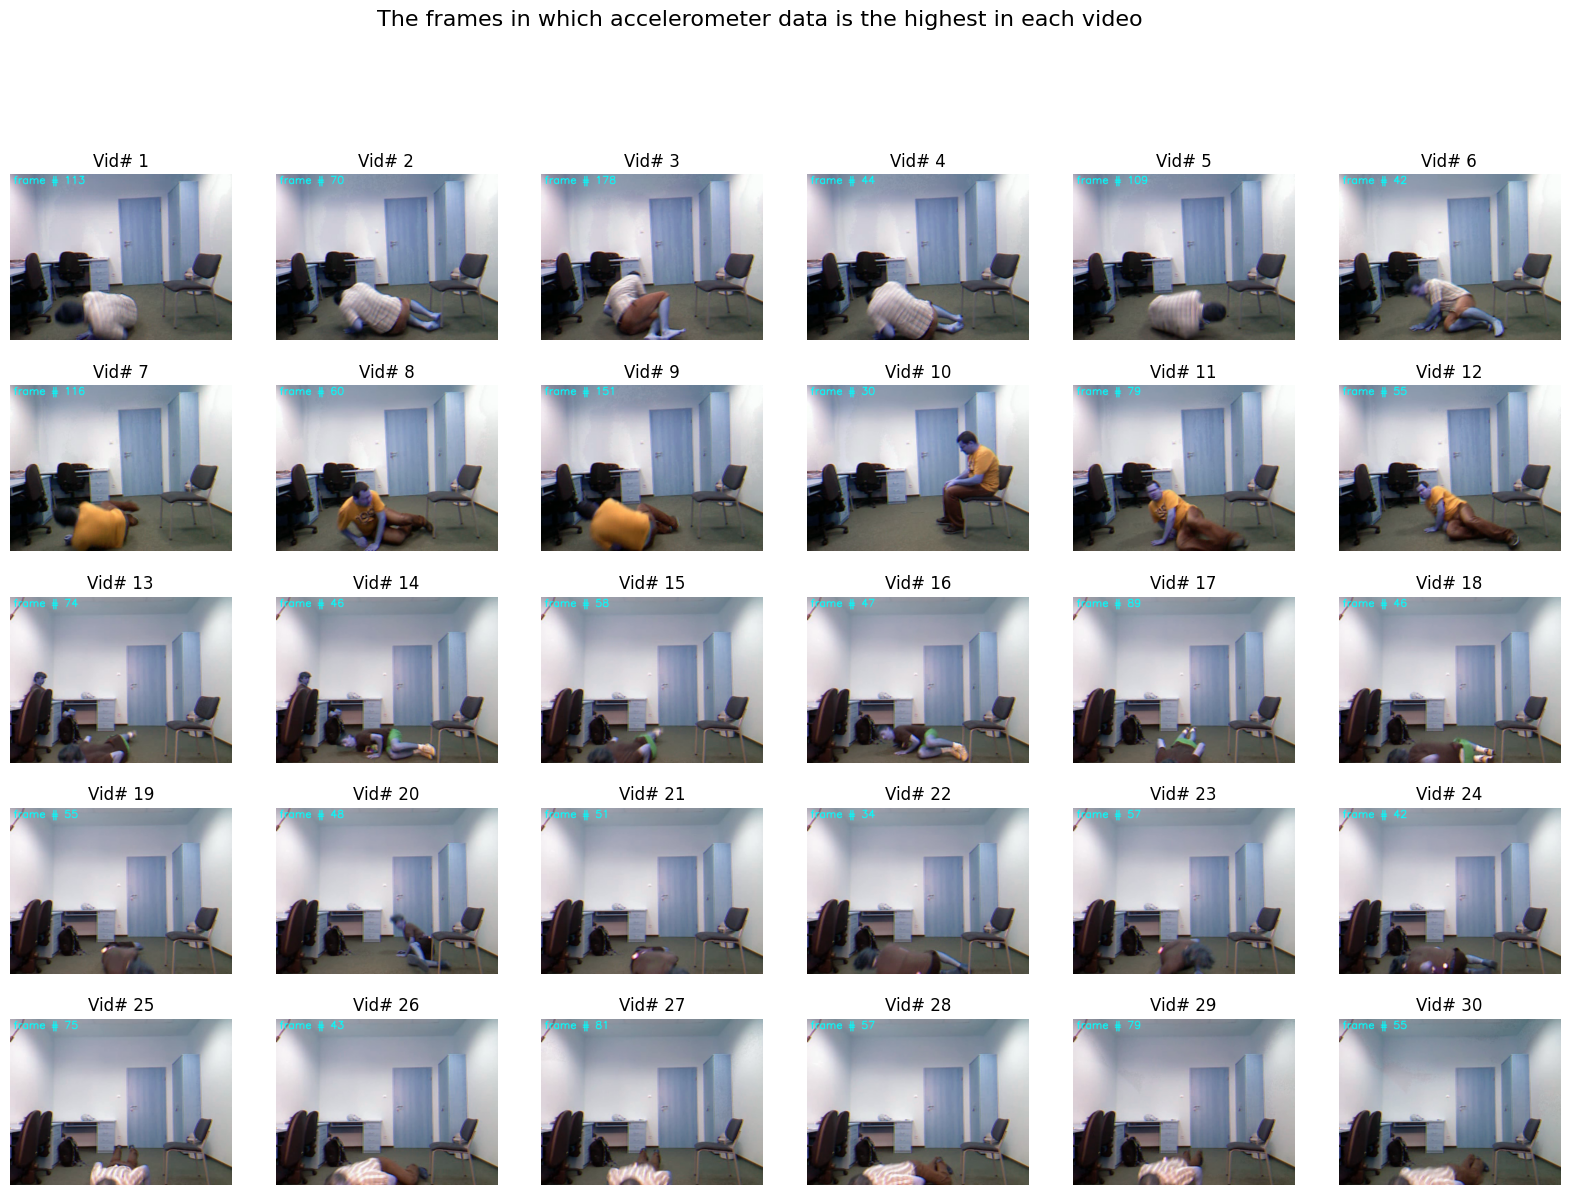

In [ ]:
#@title Frames of highest accelerometer data
plt.figure(figsize=(20,16))
plt.suptitle('The frames in which accelerometer data is the highest in each video', fontsize=16)
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.imshow(fall_frames[i][0])
    plt.axis('off')
    plt.title(f'Vid# {i+1}')
plt.show()

In [17]:
#@title SVM Percentage
new_labels = []
for i in range(1,31):
  svm_df_vid = svm_df[svm_df['Video_num'] == i]
  val_df_vid = valid_df[valid_df['video_num'] == i]
  vid_labels = np.zeros(len(svm_df_vid['predictions'].values))
  x = val_df_vid['frame_idx'].values[0]
  vid_labels[x:] = 1
  new_labels = np.append(new_labels,vid_labels, axis=0)

results = []
correct_predictions = 0
total_predictions = 0

MP_results = []
MP_correct_predictions = 0

# Extract predictions and true labels
mp_preds = svm_df['MP_predictions'].values
mv_preds = svm_df['predictions'].values

# Iterate through each row in valid_df
for i, label in enumerate(new_labels):
    if label == mp_preds[i]:
        MP_correct_predictions += 1
    if label == mv_preds[i]:
        correct_predictions += 1
    total_predictions += 1

# Calculate and display results
if total_predictions > 0:
    percentage_correct = (correct_predictions / total_predictions) * 100
    MP_percentage_correct = (MP_correct_predictions / total_predictions) * 100
else:
    percentage_correct = 0
    MP_percentage_correct = 0

print(f"Total predictions: {total_predictions}")
print(f"MoveNet Correct predictions: {correct_predictions}")
print(f"MoveNet Percentage of correct predictions: {percentage_correct:.2f}%")
print(f"MediaPipe Correct predictions: {MP_correct_predictions}")
print(f"MediaPipe Percentage of correct predictions: {MP_percentage_correct:.2f}%")

# Optionally store the accuracy values for further use
mp_SVM = MP_percentage_correct
mv_SVM = percentage_correct

Total predictions: 2995
MoveNet Correct predictions: 2518
MoveNet Percentage of correct predictions: 84.07%
MediaPipe Correct predictions: 2496
MediaPipe Percentage of correct predictions: 83.34%


In [16]:
#@title MLP Percentage
results = []
correct_predictions = 0
total_predictions = 0

MP_results = []
MP_correct_predictions = 0

# Extract predictions and true labels
mp_preds = dnn_df['MP_predictions'].values
mv_preds = dnn_df['predictions'].values
mp_preds_binary = [1 if pred > 0.7 else 0 for pred in mp_preds]
mv_preds_binary = [1 if pred > 0.7 else 0 for pred in mv_preds]
# Iterate through each row in valid_df
for i, label in enumerate(new_labels):
    if label == mp_preds_binary[i]:
        MP_correct_predictions += 1
    if label == mv_preds_binary[i]:
        correct_predictions += 1
    total_predictions += 1

# Calculate and display results
if total_predictions > 0:
    percentage_correct = (correct_predictions / total_predictions) * 100
    MP_percentage_correct = (MP_correct_predictions / total_predictions) * 100
else:
    percentage_correct = 0
    MP_percentage_correct = 0

print(f"Total predictions: {total_predictions}")
print(f"MoveNet Correct predictions: {correct_predictions}")
print(f"MoveNet Percentage of correct predictions: {percentage_correct:.2f}%")
print(f"MediaPipe Correct predictions: {MP_correct_predictions}")
print(f"MediaPipe Percentage of correct predictions: {MP_percentage_correct:.2f}%")

# Optionally store the accuracy values for further use
mp_MLP = MP_percentage_correct
mv_MLP = percentage_correct

Total predictions: 2995
MoveNet Correct predictions: 2501
MoveNet Percentage of correct predictions: 83.51%
MediaPipe Correct predictions: 2489
MediaPipe Percentage of correct predictions: 83.11%


In [15]:
#@title LSTM Percentage
results = []
correct_predictions = 0
total_predictions = 0

MP_results = []
MP_correct_predictions = 0

# Extract predictions and true labels
mp_preds = lstm_df['MP_predictions'].values
mv_preds = lstm_df['predictions'].values
mp_preds_binary = [1 if pred > 0.7 else 0 for pred in mp_preds]
mv_preds_binary = [1 if pred > 0.7 else 0 for pred in mv_preds]
# Iterate through each row in valid_df
for i, label in enumerate(new_labels):
    if label == mp_preds_binary[i]:
        MP_correct_predictions += 1
    if label == mv_preds_binary[i]:
        correct_predictions += 1
    total_predictions += 1

# Calculate and display results
if total_predictions > 0:
    percentage_correct = (correct_predictions / total_predictions) * 100
    MP_percentage_correct = (MP_correct_predictions / total_predictions) * 100
else:
    percentage_correct = 0
    MP_percentage_correct = 0

print(f"Total predictions: {total_predictions}")
print(f"MoveNet Correct predictions: {correct_predictions}")
print(f"MoveNet Percentage of correct predictions: {percentage_correct:.2f}%")
print(f"MediaPipe Correct predictions: {MP_correct_predictions}")
print(f"MediaPipe Percentage of correct predictions: {MP_percentage_correct:.2f}%")

# Optionally store the accuracy values for further use
mp_LSTM = MP_percentage_correct
mv_LSTM = percentage_correct

Total predictions: 2995
MoveNet Correct predictions: 2353
MoveNet Percentage of correct predictions: 78.56%
MediaPipe Correct predictions: 2340
MediaPipe Percentage of correct predictions: 78.13%


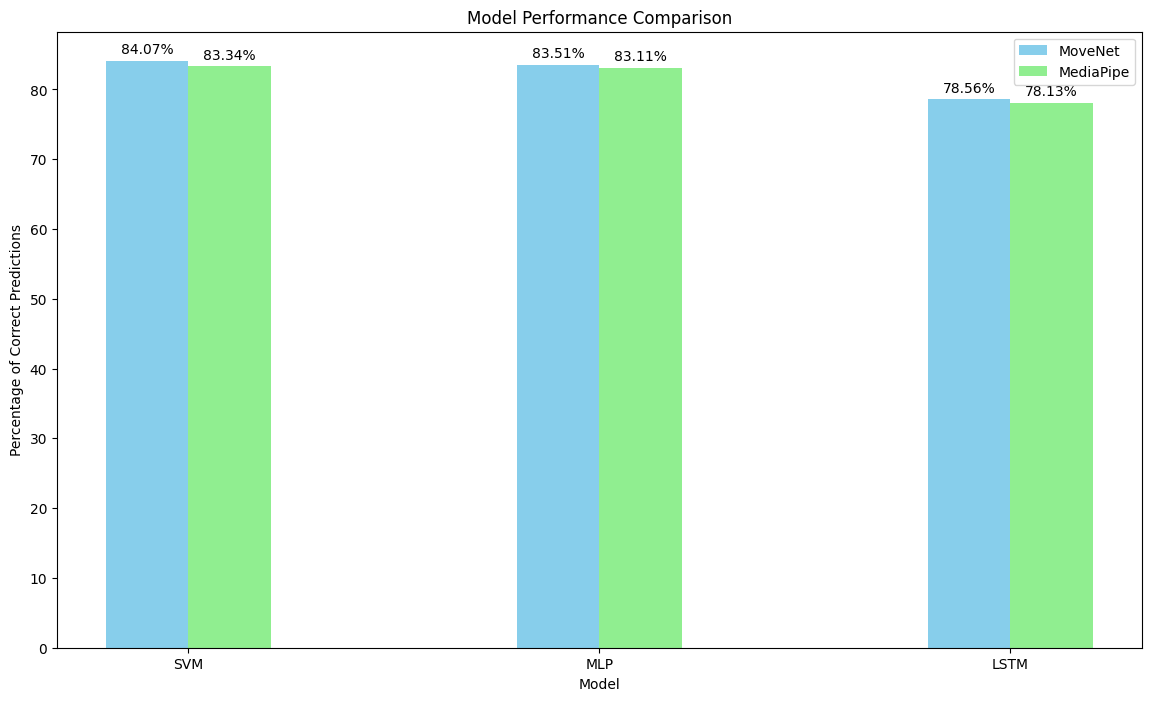

In [29]:
#@title Performance bar plot
labels = ['SVM' , 'MLP' , 'LSTM']
moveNet_performance = [mv_SVM, mv_MLP, mv_LSTM]
mediaPipe_performance = [mp_SVM,mp_MLP ,mp_LSTM]

x = np.arange(len(labels))  # the label locations
width =  0.2  # the width of the bars

# Create the plot with the specified figure size
fig, ax = plt.subplots(figsize=(14,8))

# Create bars with custom colors
rects1 = ax.bar(x - width/2, moveNet_performance, width, color='skyblue', label='MoveNet')
rects2 = ax.bar(x + width/2, mediaPipe_performance, width, color='lightgreen', label='MediaPipe')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Model')
ax.set_ylabel('Percentage of Correct Predictions')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper right')  # Move legend to the top right

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# Show the plot
plt.show()


In [ ]:
|